In [1]:
%load_ext autoreload
%autoreload 2

# Segger Minimal Example

In [2]:
from segger.data.io import XeniumSample
from segger.training.train import LitSegger
from segger.training.segger_data_module import SeggerDataModule
from lightning.pytorch.loggers import CSVLogger
from pytorch_lightning import Trainer
from pathlib import Path
from lightning.pytorch.plugins.environments import LightningEnvironment

In [3]:
from pytorch_lightning.plugins.environments import SLURMEnvironment
SLURMEnvironment.detect = lambda: False

## Create Dataset

Explain things here

In [4]:
xenium_data_dir = Path('../../dev/tutorial/xenium_data/')
segger_data_dir = Path('../../dev/tutorial/segger_data/')

In [5]:
# Setup Xenium sample to create dataset
xs = XeniumSample(verbose=False)
xs.set_file_paths(
    transcripts_path=xenium_data_dir / 'transcripts.parquet',
    boundaries_path=xenium_data_dir / 'nucleus_boundaries.parquet',
)
xs.set_metadata()

In [6]:
try:
    xs.save_dataset_for_segger(
        processed_dir=segger_data_dir,
        r_tx=5,
        k_tx=30,
        receptive_field={'k_bd': 3, 'dist_bd': 20,'k_tx': 30, 'dist_tx': 5},
        x_size=500,
        y_size=500,
        d_x=480,
        d_y=480,
        margin_x=10,
        margin_y=10,
    )
except AssertionError as err:
    print(f'Dataset already exists at {segger_data_dir}')

Dataset already exists at ../../dev/tutorial/segger_data


## Train Segger Model

Explain things here

In [7]:
# Base directory to store Pytorch Lightning models
models_dir = Path('../../dev/tutorial/models/')

In [8]:
# Initialize the Lightning model
metadata = (["tx", "bd"], [("tx", "belongs", "bd"), ("tx", "neighbors", "tx")])
ls = LitSegger(
    num_tx_tokens=500,
    init_emb=8,
    hidden_channels=32,
    out_channels=8,
    heads=2,
    num_mid_layers=2,
    aggr='sum',
    metadata=metadata,
)

/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [9]:
# Initialize the Lightning data module
dm = SeggerDataModule(
    data_dir=segger_data_dir,
    batch_size=1,  # explain other options above
    num_workers=4,  # explain other options above
)

In [10]:
# Initialize the Lightning trainer
trainer = Trainer(
    accelerator='cuda',  # explain other options above
    strategy='auto',
    precision='16-mixed',
    devices=1,  # explain other options above
    max_epochs=200,  # explain other options above
    default_root_dir=models_dir,
    logger=CSVLogger(models_dir),
)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
# Fit model
trainer.fit(model=ls, datamodule=dm)

You are using a CUDA device ('NVIDIA A100 80GB PCIe MIG 2g.20gb') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Processing...
Done!
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [MIG-9b1ee058-0b73-52d6-b909-b056af809b4b,MIG-e8861a3f-0f14-562d-ad70-c9f56ba1db06,MIG-e9c80ed6-e922-5f99-84ba-fd31a06f7f82,MIG-ddac4c2a-2ccf-5d86-be01-c9e27dd3cd76]
/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/pytorch_lightning/utilities/model_summary/model_summary.py:477: The total number of parameters detected may be inaccurate because the model contains an instance of `UninitializedParameter`. To get an accurate number, set `self.example_input_array` in your LightningModule.

  | Name      | Type              | P

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/lilac/data/peer/moormana/.micromamba/envs/segger-rapids-11.8/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Evaluate results
# Explain what we expect to see here
model_version = 44026  # from training output above
model_path = models_dir / 'lightning_logs' / f'version_{model_version}'
metrics = pd.read_csv(model_path / 'metrics.csv', index_col=1)

fig, ax = plt.subplots(1,1, figsize=(2,2))

for col in metrics.columns.difference(['epoch']):
    metric = metrics[col].dropna()
    ax.plot(
        metric.index,
        metric.values,
        label=col,
    )
ax.legend(loc=(1, 0.33))
ax.set_ylim(0, 1)
ax.set_xlabel('Step')

## Predict Segmentation Assignments

Explain things here

In [11]:
from segger.prediction.predict import predict, load_model

In [12]:
# Checkpoint directory for Lightning model above
model_version = 44026  # from training output above
model_path = models_dir / 'lightning_logs' / f'version_{model_version}'
model = load_model(model_path / 'checkpoints')

In [13]:
dm.setup()

Processing...
Done!


In [21]:
segmentation = predict(
    model,
    dm.train_dataloader(),
    score_cut = 0.5,
    receptive_field={'k_bd': 5, 'dist_bd': 20, 'k_tx': 15, 'dist_tx': 5},
    use_cc = False,
)

100%|██████████| 7/7 [00:11<00:00,  1.68s/it]


<Axes: xlabel='score', ylabel='Count'>

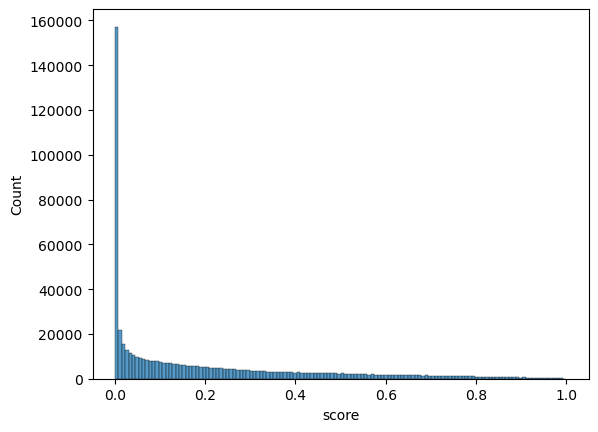

In [24]:
import seaborn as sns
sns.histplot(
    segmentation['score'],
)